<a href="https://colab.research.google.com/github/clementlemon02/medical-articles-topic-classification/blob/main/Medical%20Articles%20Topic%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import *

#**Data Scraping**

In [ ]:
api_key = '86e6e8e5e48ccb07c3b8f153ca45b0d2'
browser_api_key='7f59af901d2d86f78a1fd60c1bf9426a'

In [ ]:
data=[]

In [ ]:
medicine_topics_and_genres = [
    "Clinical Medicine",
    "Internal Medicine", "Surgery", "Pediatrics", "Obstetrics and Gynecology", "Psychiatry", "Neurology", "Radiology", "Anesthesiology", "Emergency Medicine", "Dermatology", "Ophthalmology", "Orthopedics",
    "Medical Specializations",
    "Cardiology", "Oncology", "Endocrinology", "Nephrology", "Gastroenterology", "Pulmonology", "Rheumatology", "Infectious Diseases", "Hematology", "Allergy and Immunology",
    "Medical Research and Academia",
    "Biomedical Research", "Clinical Trials", "Epidemiology", "Public Health", "Medical Education",
    "Alternative and Complementary Medicine",
    "Acupuncture", "Naturopathy", "Ayurveda", "Homeopathy", "Traditional Chinese Medicine",
    "Medical Ethics and Law",
    "Bioethics", "Medical Jurisprudence", "Healthcare Policy",
    "Medical Technology",
    "Biotechnology", "Medical Devices", "Telemedicine", "Health Informatics",
    "Healthcare Management and Administration",
    "Hospital Management", "Healthcare Policy", "Health Economics",
    "Global Health and Epidemiology",
    "Infectious Disease Control", "Vaccination Programs", "Pandemics", "Tropical Medicine",
    "Patient Care and Counseling",
    "Palliative Care", "Geriatrics", "Hospice Care", "Mental Health Counseling",
    "Medical Journalism and Communication",
    "Health Reporting", "Medical Writing", "Science Communication",
    "Medical History and Philosophy",
    "History of Medicine", "Philosophy of Medicine",
    "Health and Wellness",
    "Nutrition", "Fitness", "Preventive Medicine",
    "Medical Humanities",
    "Literature and Medicine", "Medical Anthropology", "Medical Sociology",
    "Emergency Response and Disaster Medicine",
    "Emergency Preparedness", "Disaster Relief",
    "Veterinary Medicine",
    "Small Animal Medicine", "Large Animal Medicine", "Exotic Animal Medicine"
]

In [ ]:
for query in medicine_topics_and_genres:
    base_url = 'https://api.elsevier.com/content/search/sciencedirect'

    params = {
        'query': query,
        'apiKey': browser_api_key,
        'httpAccept': 'application/json'
    }
    try:
      initSearch = requests.get(base_url, params=params)
      maxcount=initSearch.json()['search-results']['opensearch:totalResults']
      for page in range(1,2):
        params['start']=(page-1)*25
        params['count']=25
        searchresults=requests.get(base_url, params=params)
        for dic in searchresults.json()['search-results']['entry']:
          pii=dic['pii']
          url = f'https://api.elsevier.com/content/article/pii/{pii}'

          headers = {
              'Accept': 'application/json',
              'X-ELS-APIKey': api_key
          }
          try:
            response = requests.get(url, headers=headers)
            originalText=response.json()['full-text-retrieval-response']['originalText']
            abstract = response.json()['full-text-retrieval-response']['coredata']['dc:description'].strip().replace('\n', '')
            title = response.json()['full-text-retrieval-response']['coredata']['dc:title'].strip().replace('\n', '')
            data.append({'title':title,'query':query,'abstract':abstract,'pii':pii,'originalText':originalText})
          except Exception as e:
            pass
        break
    except Exception as e:
        print(e)

'search-results'
'search-results'
'search-results'


In [ ]:
df=pd.DataFrame(data)
df

,title,query,abstract,pii,originalText
0,Shanghai expert consensus on clinical protocol...,Clinical Medicine,This document is the revised edition of the pr...,S209549642200067X,serial JL 306590 291210 291897 31 90 Journal o...
1,Best Methods in Reproductive Medicine Clinical...,Clinical Medicine,This introduction is to a Views and Reviews se...,S0015028224001997,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
2,Accessibility of clinical study reports suppor...,Clinical Medicine,Objectives Clinical study reports (CSRs) are h...,S0895435624000180,serial JL 271297 291210 291823 291910 31 90 Jo...
3,Comparison of ChatGPT Version 3.5 & 4 For Util...,Clinical Medicine,Integration of ChatGPT in Respiratory medicine...,S2590041224000084,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
4,Clinical efficacy and molecular mechanism of C...,Clinical Medicine,Ethnopharmacological relevance Autoimmune Thyr...,S0378874123015593,serial JL 271283 291210 291727 31 90 Journal o...
...,...,...,...,...,...
1568,Awake intracerebroventricular delivery and saf...,Large Animal Medicine,Oligonucleotide therapeutics offer great promi...,S2329050123001614,serial JL 315509 291210 291847 291856 291858 3...
1569,Utility and limitations of postmortem computed...,Large Animal Medicine,Objectives Injuries caused by...,S2666225624000113,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
1570,Beyond probiotics: Exploring the potential of ...,Large Animal Medicine,Postbiotics and parabiotics (PP) are emerging ...,S0034528823003843,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
1571,Adaptable three-pin skull clamp for large anim...,Large Animal Medicine,"Traditionally, surgical head immobilization fo...",S2468067223000792,serial JL 314097 291210 291690 291802 291848 2...


Some abstract are one word only and we remove them

In [ ]:
filtered_df = df[df['abstract'].str.split().str.len() > 1]

filtered_df

,title,query,abstract,pii,originalText
0,Shanghai expert consensus on clinical protocol...,Clinical Medicine,This document is the revised edition of the pr...,S209549642200067X,serial JL 306590 291210 291897 31 90 Journal o...
1,Best Methods in Reproductive Medicine Clinical...,Clinical Medicine,This introduction is to a Views and Reviews se...,S0015028224001997,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
2,Accessibility of clinical study reports suppor...,Clinical Medicine,Objectives Clinical study reports (CSRs) are h...,S0895435624000180,serial JL 271297 291210 291823 291910 31 90 Jo...
3,Comparison of ChatGPT Version 3.5 & 4 For Util...,Clinical Medicine,Integration of ChatGPT in Respiratory medicine...,S2590041224000084,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
4,Clinical efficacy and molecular mechanism of C...,Clinical Medicine,Ethnopharmacological relevance Autoimmune Thyr...,S0378874123015593,serial JL 271283 291210 291727 31 90 Journal o...
...,...,...,...,...,...
1568,Awake intracerebroventricular delivery and saf...,Large Animal Medicine,Oligonucleotide therapeutics offer great promi...,S2329050123001614,serial JL 315509 291210 291847 291856 291858 3...
1569,Utility and limitations of postmortem computed...,Large Animal Medicine,Objectives Injuries caused by...,S2666225624000113,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
1570,Beyond probiotics: Exploring the potential of ...,Large Animal Medicine,Postbiotics and parabiotics (PP) are emerging ...,S0034528823003843,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
1571,Adaptable three-pin skull clamp for large anim...,Large Animal Medicine,"Traditionally, surgical head immobilization fo...",S2468067223000792,serial JL 314097 291210 291690 291802 291848 2...


In [ ]:

filtered_df.drop_duplicates(subset='title', inplace=True)


<ipython-input-9-f7baf2046b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates(subset='title', inplace=True)


In [ ]:
filtered_df.to_csv('queryData.csv')

In [ ]:
filtered_df

,title,query,abstract,pii,originalText
0,Shanghai expert consensus on clinical protocol...,Clinical Medicine,This document is the revised edition of the pr...,S209549642200067X,serial JL 306590 291210 291897 31 90 Journal o...
1,Best Methods in Reproductive Medicine Clinical...,Clinical Medicine,This introduction is to a Views and Reviews se...,S0015028224001997,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
2,Accessibility of clinical study reports suppor...,Clinical Medicine,Objectives Clinical study reports (CSRs) are h...,S0895435624000180,serial JL 271297 291210 291823 291910 31 90 Jo...
3,Comparison of ChatGPT Version 3.5 & 4 For Util...,Clinical Medicine,Integration of ChatGPT in Respiratory medicine...,S2590041224000084,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
4,Clinical efficacy and molecular mechanism of C...,Clinical Medicine,Ethnopharmacological relevance Autoimmune Thyr...,S0378874123015593,serial JL 271283 291210 291727 31 90 Journal o...
...,...,...,...,...,...
1565,The translational value of animal models in or...,Large Animal Medicine,Rare diseases are characterized by a substanti...,S0273230020302361,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
1568,Awake intracerebroventricular delivery and saf...,Large Animal Medicine,Oligonucleotide therapeutics offer great promi...,S2329050123001614,serial JL 315509 291210 291847 291856 291858 3...
1569,Utility and limitations of postmortem computed...,Large Animal Medicine,Objectives Injuries caused by...,S2666225624000113,{'xocs:doc': {'xocs:meta': {'xocs:open-access'...
1571,Adaptable three-pin skull clamp for large anim...,Large Animal Medicine,"Traditionally, surgical head immobilization fo...",S2468067223000792,serial JL 314097 291210 291690 291802 291848 2...


In [ ]:
file_path = './queryData.csv'

data = pd.read_csv(file_path)
print(data.head())
print(len(data))

ParserError: Error tokenizing data. C error: EOF inside string starting at row 457

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
data['combined_text'] = data['title'] + ' ' + data['abstract']

custom_stop_words = set(ENGLISH_STOP_WORDS) | {'well', 'need', 'this', 'same'}

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape("!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"), ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text)
    return ' '.join(word for word in text.split() if word not in custom_stop_words)

data['clean_title'] = data['title'].apply(clean_text)
data['clean_abstract'] = data['abstract'].apply(clean_text)
data['clean_combined_text'] = data['combined_text'].apply(clean_text)

NameError: name 'data' is not defined

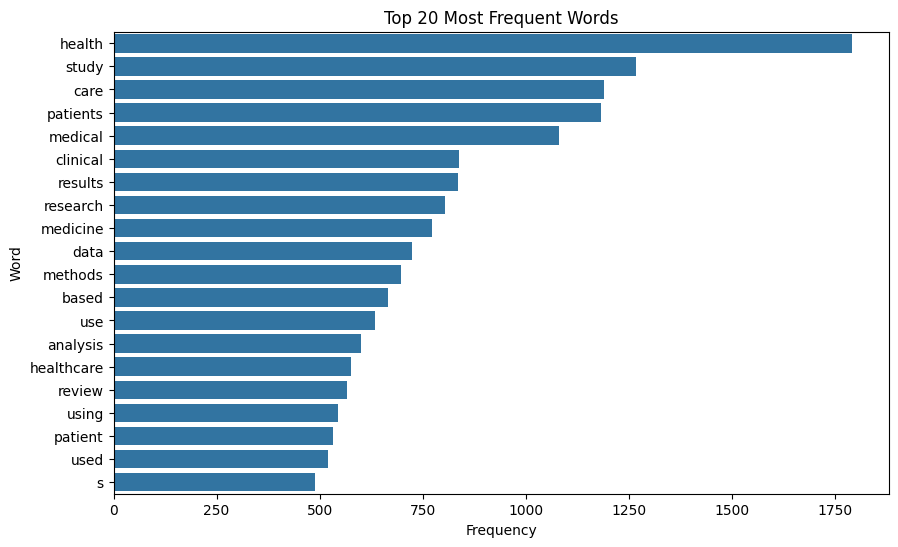

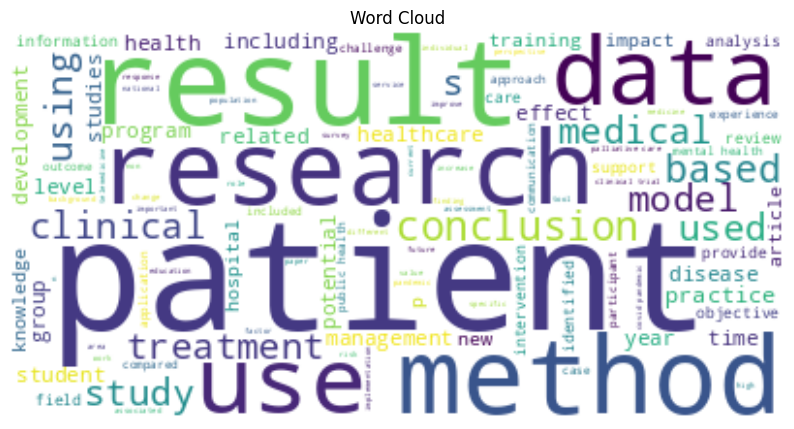

Top 20 Bi-grams: [(('public', 'health'), 239), (('mental', 'health'), 219), (('palliative', 'care'), 208), (('covid', 'pandemic'), 173), (('clinical', 'trials'), 130), (('health', 'care'), 120), (('decision', 'making'), 115), (('cross', 'sectional'), 114), (('infectious', 'diseases'), 110), (('emergency', 'medicine'), 104), (('ci', '–'), 103), (('medical', 'education'), 96), (('united', 'states'), 94), (('systematic', 'review'), 88), (('clinical', 'practice'), 81), (('artificial', 'intelligence'), 81), (('results', 'total'), 77), (('obstetrics', 'gynecology'), 77), (('health', 'informatics'), 76), (('evidence', 'based'), 73)]


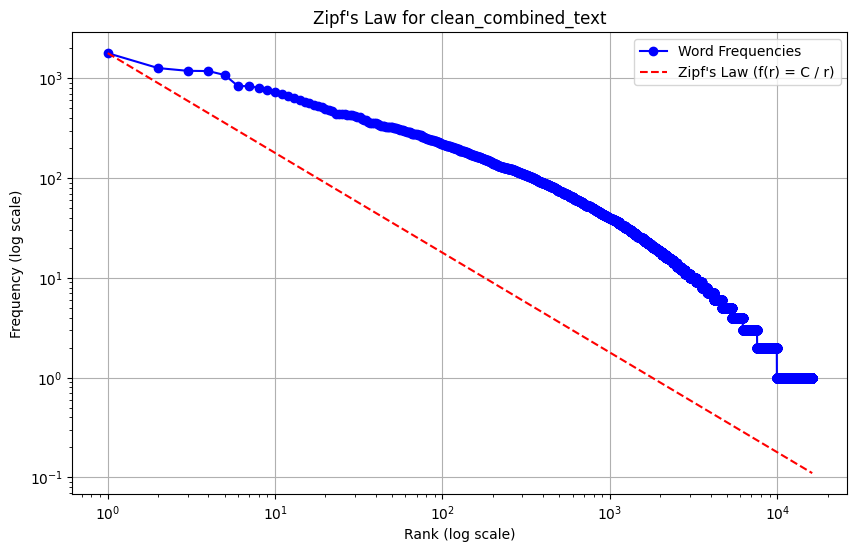

In [ ]:
# Word Frequency Analysis
def plot_word_frequency(text_series, n_top_words=20):
    words = ' '.join(text_series).split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(n_top_words)
    df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df_top_words)
    plt.title('Top {} Most Frequent Words'.format(n_top_words))
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_word_frequency(data['clean_combined_text'])

# Word Cloud
def generate_word_cloud(text_series, max_words=100):
    text = ' '.join(text_series)
    wordcloud = WordCloud(max_words=max_words, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

generate_word_cloud(data['clean_combined_text'])

# N-gram Analysis (Bi-grams)
from nltk import ngrams

def get_ngram_frequency(text_series, n=2, top_n=20):
    words = ' '.join(text_series).split()
    ngrams_list = list(ngrams(words, n))
    ngram_freq = Counter(ngrams_list)
    top_ngrams = ngram_freq.most_common(top_n)
    return top_ngrams

top_bi_grams = get_ngram_frequency(data['clean_combined_text'], n=2)
print("Top 20 Bi-grams:", top_bi_grams)
all_text = ' '.join(data['clean_combined_text'])

# Tokenize the text into words
words = all_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Sort the word counts by frequency in descending order
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# Calculate ranks and frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = sorted_word_counts

# Zipf's law: f(r) = C / r
# C is the maximum frequency
C = frequencies[0]
zipf_frequencies = [C / r for r in ranks]

# Plot Zipf's law
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='o', linestyle='-', color='b', label='Word Frequencies')
plt.plot(ranks, zipf_frequencies, linestyle='--', color='r', label="Zipf's Law (f(r) = C / r)")
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf's Law for clean_combined_text")
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english', ngram_range=(1, 2))
dtm_title = vectorizer.fit_transform(data['clean_title'])
dtm_abstract = vectorizer.fit_transform(data['clean_abstract'])
dtm_combined = vectorizer.fit_transform(data['clean_combined_text'])

vectorizer_title = CountVectorizer(max_df=0.9, min_df=10, stop_words='english', ngram_range=(1, 2))
dtm_title = vectorizer_title.fit_transform(data['clean_title'])
tf_feature_names_title = vectorizer_title.get_feature_names_out()

vectorizer_abstract = CountVectorizer(max_df=0.9, min_df=10, stop_words='english', ngram_range=(1, 2))
dtm_abstract = vectorizer_abstract.fit_transform(data['clean_abstract'])
tf_feature_names_abstract = vectorizer_abstract.get_feature_names_out()

vectorizer_combined = CountVectorizer(max_df=0.9, min_df=10, stop_words='english', ngram_range=(1, 2))
dtm_combined = vectorizer_combined.fit_transform(data['clean_combined_text'])
tf_feature_names_combined = vectorizer_combined.get_feature_names_out()



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

def perform_lda_grid_search(dtm):
    search_params = {'n_components': [5], 'learning_decay': [.1, .3, .5]}
    lda = LatentDirichletAllocation(random_state=42)
    model = GridSearchCV(lda, param_grid=search_params) # Helps us to do an exhaustive search for an estimator to optimise our model

    # Run grid search
    model.fit(dtm)

    # Best Model
    best_lda_model = model.best_estimator_

    # Output the results
    print("Best Model's Params: ", model.best_params_)
    print("Best Log Likelihood Score: ", model.best_score_)
    print("Model Perplexity: ", best_lda_model.perplexity(dtm))

    return best_lda_model, model.best_params_, model.best_score_, best_lda_model.perplexity(dtm)



In [ ]:
# Model for Titles
print("Model for Titles:")
best_lda_title, params_title, score_title, perplexity_title = perform_lda_grid_search(dtm_title)

# Model for Abstracts
print("\nModel for Abstracts:")
best_lda_abstract, params_abstract, score_abstract, perplexity_abstract = perform_lda_grid_search(dtm_abstract)

# Model for Combined Texts
print("\nModel for Combined Texts:")
best_lda_combined, params_combined, score_combined, perplexity_combined = perform_lda_grid_search(dtm_combined)


Model for Titles:
Best Model's Params:  {'learning_decay': 0.1, 'n_components': 5}
Best Log Likelihood Score:  -11652.352384454285
Model Perplexity:  295.6946118872428

Model for Abstracts:
Best Model's Params:  {'learning_decay': 0.1, 'n_components': 5}
Best Log Likelihood Score:  -233173.19395211776
Model Perplexity:  1415.2719515232334

Model for Combined Texts:
Best Model's Params:  {'learning_decay': 0.1, 'n_components': 5}
Best Log Likelihood Score:  -254259.47974839312
Model Perplexity:  1394.126534368282


In [ ]:
def get_top_words_from_model(model, feature_names, n_top_words=10):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_top_words:]
        top_features = [feature_names[i] for i in top_indices]
        top_words.append(top_features)
    return top_words


top_words_title = get_top_words_from_model(best_lda_title, tf_feature_names_title, 10)
top_words_abstract = get_top_words_from_model(best_lda_abstract, tf_feature_names_abstract, 10)
top_words_combined = get_top_words_from_model(best_lda_combined, tf_feature_names_combined, 10)


In [ ]:
texts_title = [doc.split() for doc in data['clean_title']]
texts_abstract = [doc.split() for doc in data['clean_abstract']]
texts_combined = [doc.split() for doc in data['clean_combined_text']]


In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import gensim

In [ ]:
dictionary_title = Dictionary(texts_title)
corpus_title = [dictionary_title.doc2bow(text) for text in texts_title]

dictionary_abstract = Dictionary(texts_abstract)
corpus_abstract = [dictionary_abstract.doc2bow(text) for text in texts_abstract]

dictionary_combined = Dictionary(texts_combined)
corpus_combined = [dictionary_combined.doc2bow(text) for text in texts_combined]


In [ ]:
coherence_model_title = CoherenceModel(topics=top_words_title, texts=texts_title, dictionary=dictionary_title, coherence='c_v')
coherence_score_title = coherence_model_title.get_coherence()

coherence_model_abstract = CoherenceModel(topics=top_words_abstract, texts=texts_abstract, dictionary=dictionary_abstract, coherence='c_v')
coherence_score_abstract = coherence_model_abstract.get_coherence()

coherence_model_combined = CoherenceModel(topics=top_words_combined, texts=texts_combined, dictionary=dictionary_combined, coherence='c_v')
coherence_score_combined = coherence_model_combined.get_coherence()

print('Coherence Score for Titles:', coherence_score_title)
print('Coherence Score for Abstracts:', coherence_score_abstract)
print('Coherence Score for Combined Texts:', coherence_score_combined)


Coherence Score for Titles: 0.2749928004638318
Coherence Score for Abstracts: 0.4291852943327492
Coherence Score for Combined Texts: 0.47172691033279585


In [ ]:
def display_topics_with_title(title, model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = " ".join([feature_names[i]
                                for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append("Topic {}: {}".format(topic_idx, topic_words))
    return "{}:\n{}".format(title, "\n".join(topics))

# Number of top words to display for each topic
no_top_words = 10

# Get feature names from the vectorizer
tf_feature_names = vectorizer.get_feature_names_out()

# Display the top words for each topic along with title
topics_with_abstract = display_topics_with_title("Abstract Topics", best_lda_abstract, tf_feature_names, no_top_words)
topics_with_title = display_topics_with_title("Title Topics", best_lda_title, tf_feature_names, no_top_words)
topics_with_combined = display_topics_with_title("Combined Topics", best_lda_combined, tf_feature_names, no_top_words)

# Print topics
print(topics_with_title)
print("\n")
print(topics_with_abstract)
print("\n")
print(topics_with_combined)


Title Topics:
Topic 0: accepted advanced america cam attended burnout aim study cam use alongside biomarkers
Topic 1: approval addressing america biomarkers ages areas acid blood board capture
Topic 2: america ai analyse beginning appropriate behavior away authors birth approval
Topic 3: areas activity attitude biomarkers asthma apply affected attempt burnout care patients
Topic 4: agencies burnout anesthesia age sex accreditation council accreditation answer better understanding animal assist


Abstract Topics:
Topic 0: grade specialized classification mean requirement establishing market meaning acupuncture professors
Topic 1: grade registry male team prevalent market operational professors specialty series
Topic 2: outlines specialty remains suggested communication assist transition chinese mediated operational
Topic 3: male registry ct difficulties disciplinary phase detection specialty agreement inclusion criteria
Topic 4: carbon outlines outcome specialists male classification op

In [ ]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
def summarize_topic(topic_words, word_vectors):
    vectors = []
    for word in topic_words.split():
        if word in word_vectors:
            vectors.append(word_vectors[word])
    if vectors:
        mean_vector = np.mean(vectors, axis=0)
        return word_vectors.similar_by_vector(mean_vector, topn=1)[0][0]
    else:
        return "N/A"


topic_summaries_title = {topic: summarize_topic(words, word_vectors) for topic, words in topic_words_title.items()}
print(topic_summaries_title)
topic_summaries_abstract = {topic: summarize_topic(words, word_vectors) for topic, words in topic_words_abstract.items()}
print(topic_summaries_abstract)
topic_summaries_combined = {topic: summarize_topic(words, word_vectors) for topic, words in topic_words_combined.items()}
print(topic_summaries_combined)



{'Topic 0': 'well', 'Topic 1': 'other', 'Topic 2': 'even', 'Topic 3': 'risk', 'Topic 4': 'need'}
{'Topic 0': 'example', 'Topic 1': 'well', 'Topic 2': 'development', 'Topic 3': 'specific', 'Topic 4': 'similar'}
{'Topic 0': 'research', 'Topic 1': 'health', 'Topic 2': 'study', 'Topic 3': 'care', 'Topic 4': 'study'}


Topic #0


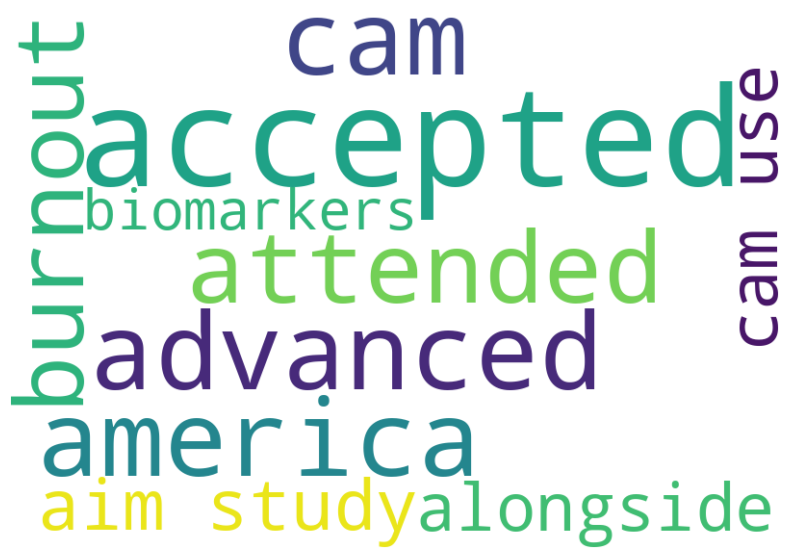

Topic #1


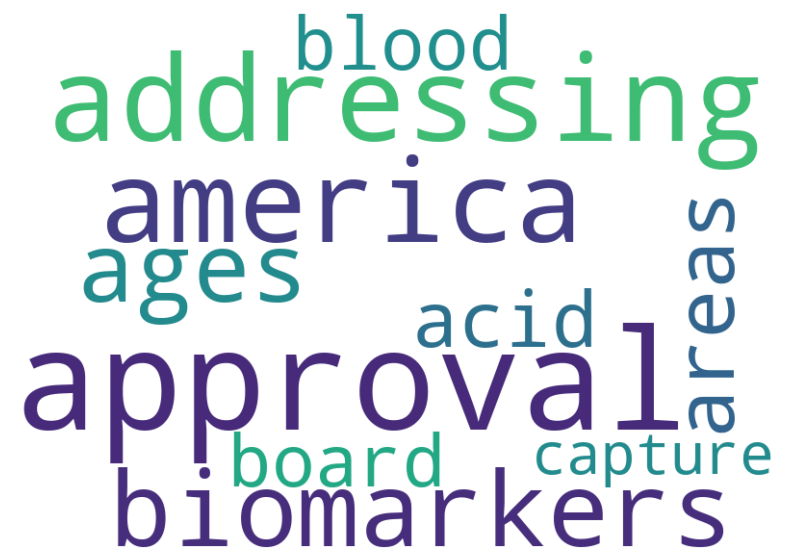

Topic #2


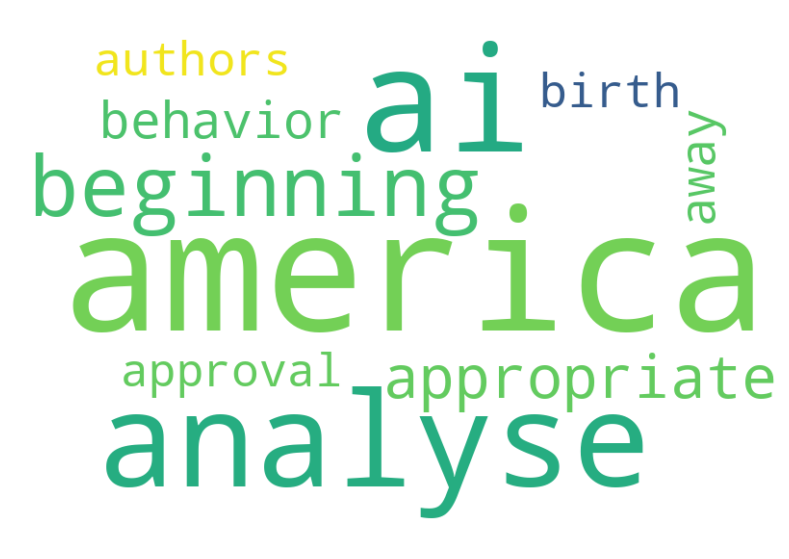

Topic #3


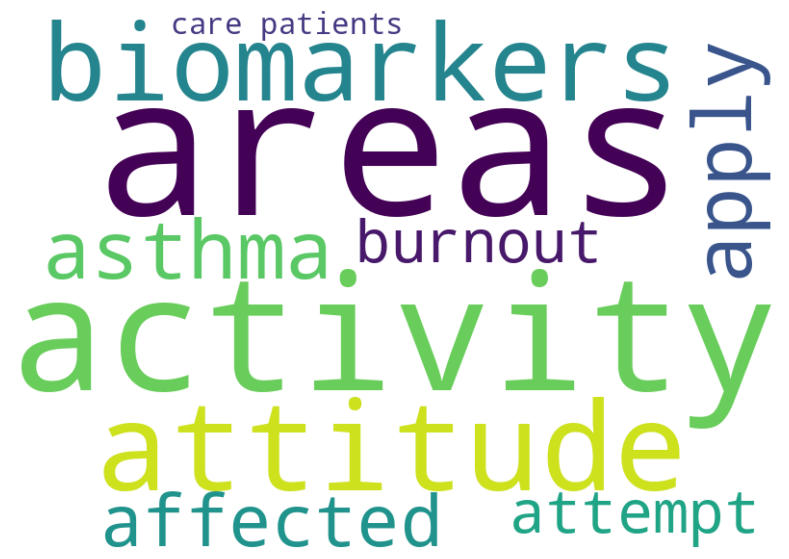

Topic #4


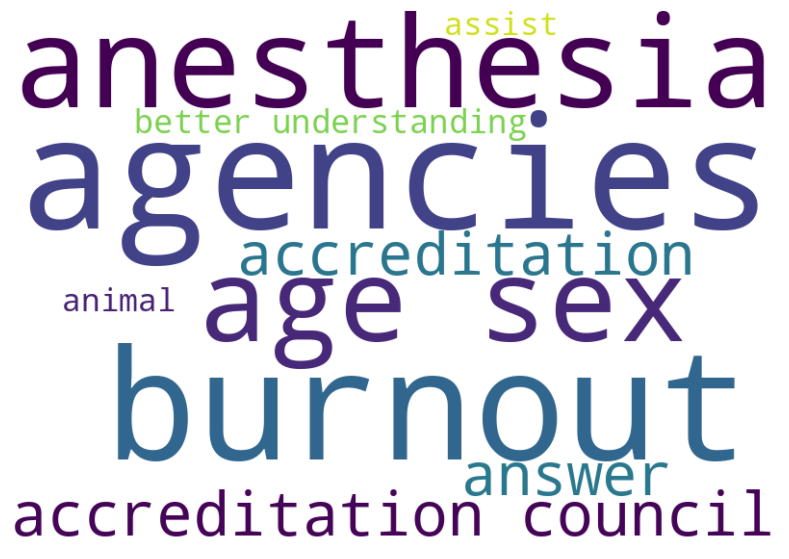

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx, topic in enumerate(best_lda_title.components_):
    print(f"Topic #{topic_idx}")
    topic_words = {tf_feature_names[i]: topic[i] for i in topic.argsort()[:-10 - 1:-1]}
    wordcloud = WordCloud(width=800, height=560, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def plot_dominant_topics(doc_topics, model_name):
    dominant_topic = np.argmax(doc_topics, axis=1)

    topic_counts = Counter(dominant_topic)

    sorted_topics = sorted(topic_counts.items())

    topics, counts = zip(*sorted_topics)

    plt.figure(figsize=(10, 5))
    plt.bar(topics, counts, color='skyblue', align='center')
    plt.xticks(range(len(topic_counts)), topics)
    plt.xlabel('Topic')
    plt.ylabel('Number of documents')
    plt.title(f'Dominant Topic Distribution for {model_name}')
    plt.show()


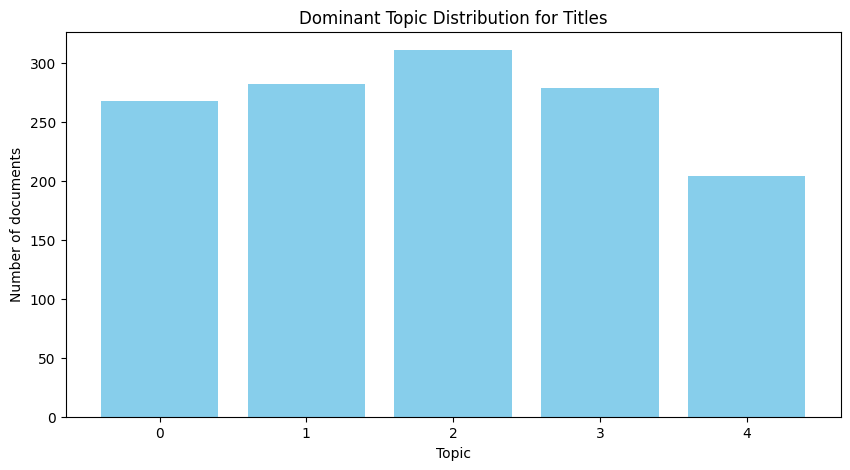

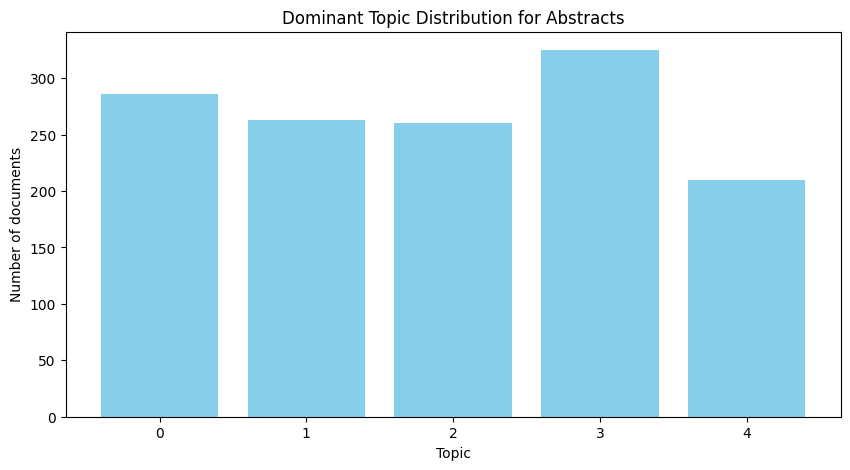

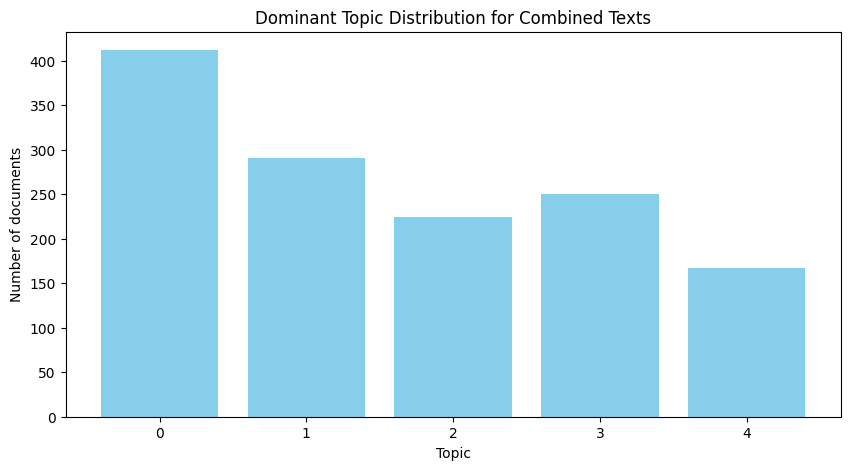

In [ ]:
# Transform the DTMs through each respective model
doc_topics_title = best_lda_title.transform(dtm_title)
doc_topics_abstract = best_lda_abstract.transform(dtm_abstract)
doc_topics_combined = best_lda_combined.transform(dtm_combined)

# Plot the dominant topics for each model
plot_dominant_topics(doc_topics_title, "Titles")
plot_dominant_topics(doc_topics_abstract, "Abstracts")
plot_dominant_topics(doc_topics_combined, "Combined Texts")


## NMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
tfidf_vectorizer_nmf = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english', ngram_range=(1, 2))
dtm_nmf = tfidf_vectorizer_nmf.fit_transform(data['clean_combined_text'])

tf_feature_names_nmf = tfidf_vectorizer_nmf.get_feature_names_out()


In [ ]:
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(dtm_nmf)

tfidf_feature_names = tfidf_vectorizer_nmf.get_feature_names_out()


In [ ]:
def display_nmf_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics["Topic " + str(topic_idx)] = " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topics

nmf_topics = display_nmf_topics(nmf_model, tfidf_feature_names, 10)
nmf_topics


{'Topic 0': 'medicine research clinical acupuncture review treatment applications ai biomedical studies',
 'Topic 1': 'palliative care palliative care hospice patients caregivers family life hospice care home',
 'Topic 2': 'health mental public public health mental health pandemic covid healthcare policy social',
 'Topic 3': 'patients telemedicine cancer surgery cam study ci patient neurological use',
 'Topic 4': 'medical students education training emergency radiology programs residency medical education residents'}

In [ ]:
n_top_words = 10

top_words_list = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    top_words_list.append(top_features)


In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import gensim

# Tokenize the documents
tokenized_docs = [[word for word in document.lower().split()] for document in data['clean_combined_text'].tolist()
]

# Create a Gensim dictionary from the tokenized documents
dictionary = Dictionary(tokenized_docs)

# Convert tokenized documents into a document-term matrix for gensim
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]


In [ ]:
# Flatten the list of top words for coherence calculation
flattened_top_words = sum(top_words_list, [])

# Compute the Coherence Score using the UMass metric
coherence_model = CoherenceModel(topics=top_words_list, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score: ', coherence_score)


Coherence Score:  0.5596690765359655


In [ ]:
def summarize_topic(topic_words, word_vectors):
    vectors = []
    for word in topic_words.split():
        if word in word_vectors:
            vectors.append(word_vectors[word])
    if vectors:
        mean_vector = np.mean(vectors, axis=0)

        return word_vectors.similar_by_vector(mean_vector, topn=1)[0][0]
    else:
        return "N/A"

topic_summaries = {topic: summarize_topic(words, word_vectors) for topic, words in nmf_topics.items()}
print(topic_summaries)


{'Topic 0': 'research', 'Topic 1': 'care', 'Topic 2': 'health', 'Topic 3': 'patients', 'Topic 4': 'medical'}


Topic #0


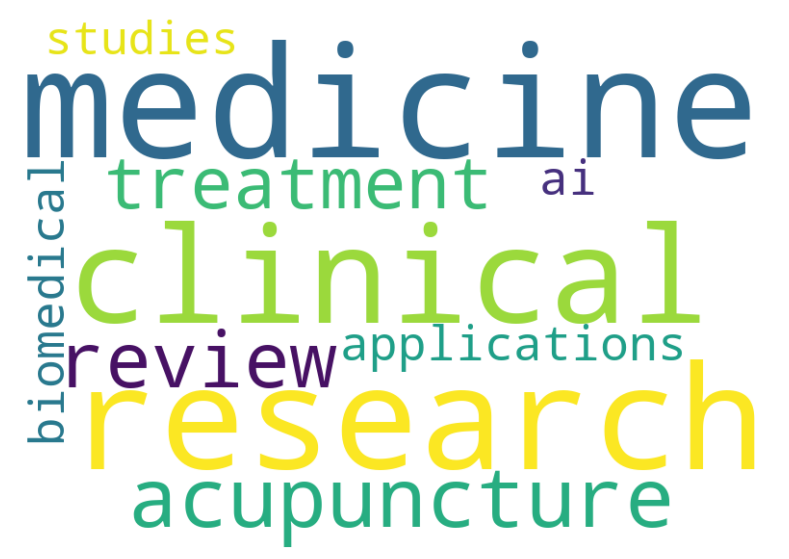

Topic #1


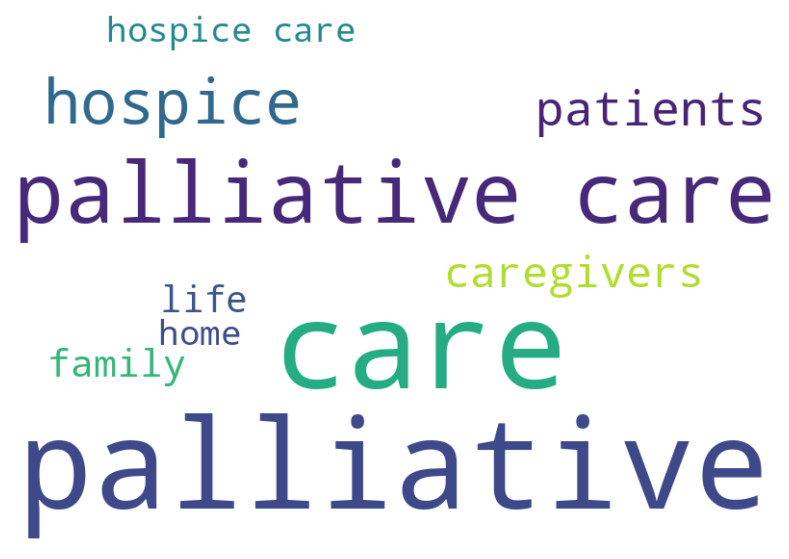

Topic #2


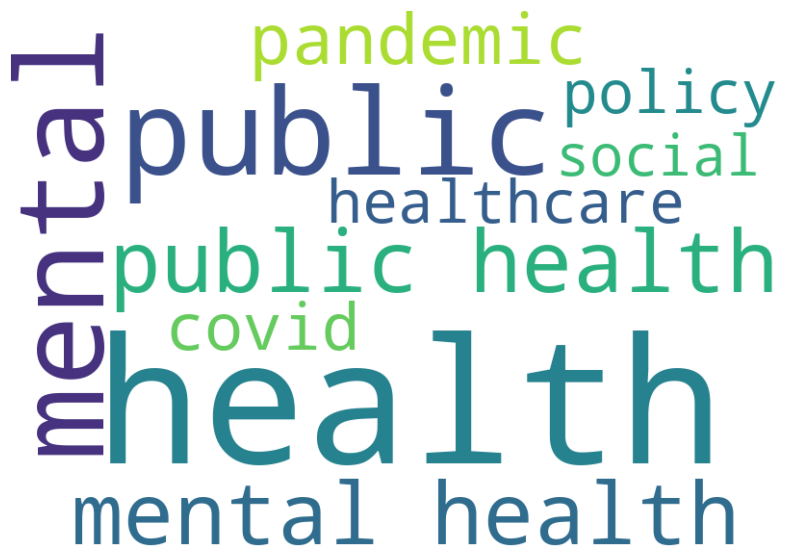

Topic #3


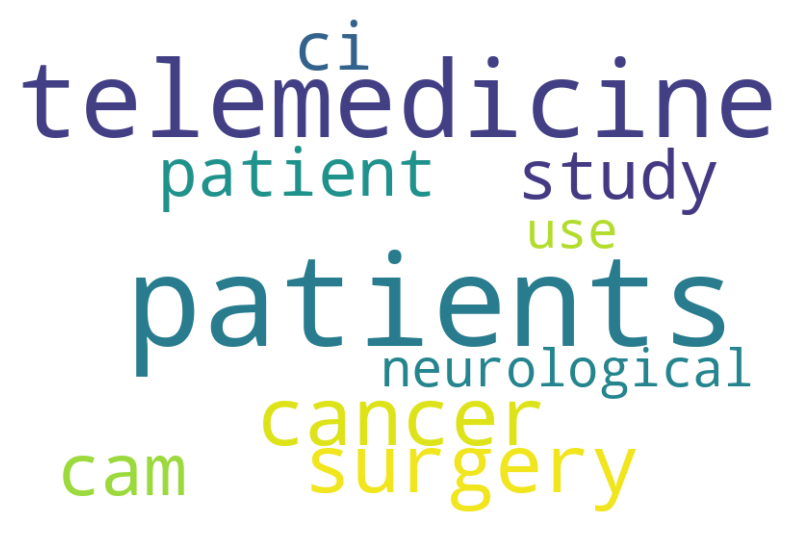

Topic #4


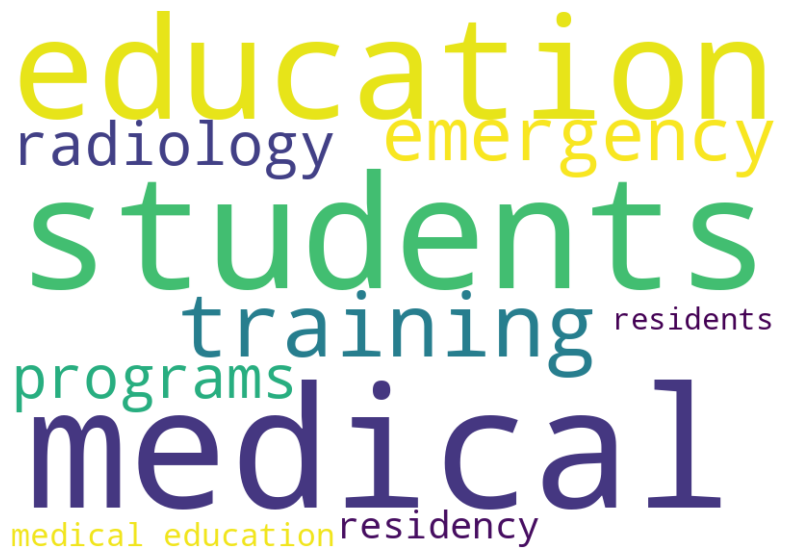

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx}")
    topic_words = {tf_feature_names_nmf[i]: topic[i] for i in topic.argsort()[:-10 - 1:-1]}
    wordcloud = WordCloud(width=800, height=560, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



In [ ]:
doc_topics_nmf = nmf_model.transform(dtm_nmf)

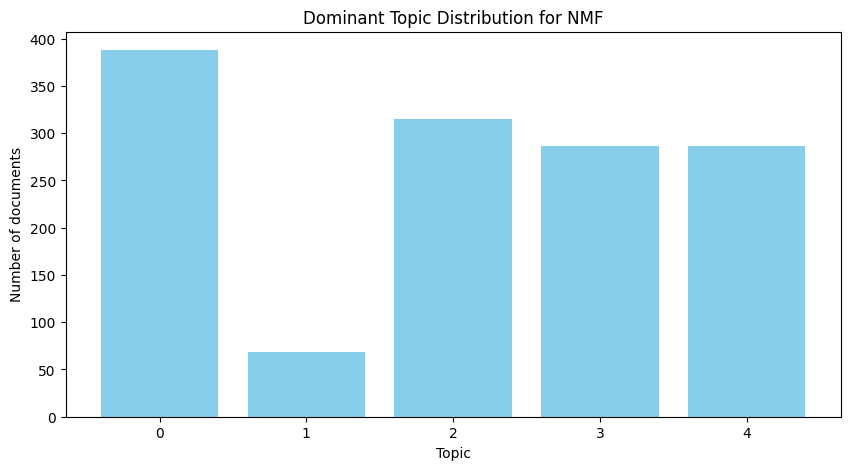

In [ ]:
plot_dominant_topics(doc_topics_nmf, "NMF")